In [2]:
install.packages("cowplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [13]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

options(repr.matrix.max.rows = 9)

# Predicting Wine Quality -- Preliminary Analysis

# Introduction

## Background

Wine quality is a complex interplay of several factors that come together. The investigation to the various elements that contribute to wine quality is important to meets consumer preferences and innovations in wine making.

## Question

Based on the character traits of the wine, what will be the quality of the given white wine?

The predictors include pH level, residual sugar (g/dm^3), chlorides (g(sodium chloride)/dm3), density (g/cm^3), and citric acid (g/dm3).

## The Dataset 

The dataset will be using the is related to white variants of the Portuguese "Vinho Verde" wine  https://archive.ics.uci.edu/dataset/186/wine+quality.

The original dataset contains both red wine and white wine. We will focus on white wine in our study.

# Methodology

In order to begin our data analysis we established that our prediction of the white wine data-set will be based on the “quality” variable, using a classification mode K-Nearest Neighbors algorithm, that uses 5 predictors to classify it in a scale from 3 to 9. In order to get to this amount of predictors we conducted our preliminary analysis with the following steps:

We separated our data into training and test data in order to avoid contaminating our prediction, doing so by using the “repr”, “tidymodels”, "cowplot", and the “tidyverse” libraries. With our training data we created a simple summary of each variable that gives us some insight on how each possible predictor is distributed and how many data points exist for each quality. With that we created a table that summarizes the mean of each variable for each of the 7 possible results of our model, allowing a visualization of how each one is distributed. This way allows us to discard predictors that present little change from low to high quality. 

In sequence, we started to use plots as a way to visually represent this expectation, beginning with density histograms colored by each quality, allowing us to compensate for the uneven distribution of data for each class. This allowed us to discard predictors with substantial outliers that would skew our model after we scale the variables. Finally we utilized scatterplots of some of the chosen predictors divided on a grid, with each row showing one quality class in order to check if they had clear aggregations which will help when using our KNN model.


# Preliminary Exploratory Data Analysis

In [4]:
#import the data

download.file("https://archive.ics.uci.edu/static/public/186/wine+quality.zip", "wine.zip")

In [5]:
unzip("wine.zip", "winequality-white.csv")

In [6]:
white_wine_data <- read_csv2("winequality-white.csv", show_col_types = FALSE) |>
    mutate_if(is.character, as.numeric) |>
    mutate(quality = as.factor(quality))
white_wine_data 

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



fixed acidity volatile acidity citric acid residual sugar chlorides
1     7            0.27             0.36        20.7           0.045    
2    63            0.30             0.34         1.6           0.049    
3    81            0.28             0.40         6.9           0.050    
4    72            0.23             0.32         8.5           0.058    
5    72            0.23             0.32         8.5           0.058    
⋮    ⋮             ⋮                ⋮           ⋮              ⋮        
4895 66            0.32             0.36        8.0            0.047    
4896 65            0.24             0.19        1.2            0.041    
4897 55            0.29             0.30        1.1            0.022    
4898  6            0.21             0.38        0.8            0.020    
     free sulfur dioxide total sulfur dioxide density pH  sulphates alcohol
1    45                  170                  1.0010    3 0.45       88    
2    14                  132                  0.9940   33 0.49       95    
3    30                   97                  0.9951  326 0.44      101    
4    47                  186                  0.9956  319 0.40       99    
5    47                  186                  0.9956  319 0.40       99    
⋮    ⋮                   ⋮                    ⋮       ⋮   ⋮         ⋮      
4895 57                  168                  0.99490 315 0.46       96    
4896 30                  111                  0.99254 299 0.46       94    
4897 20                  110                  0.98869 334 0.38      128    
4898 22                   98                  0.98941 326 0.32      118    
     quality
1    6      
2    6      
3    6      
4    6      
5    6      
⋮    ⋮      
4895 5      
4896 6      
4897 7      
4898 6

In [7]:
#split the data

set.seed(2023)
wine_data_split <- white_wine_data |>
    initial_split(prop = 0.75, strata = quality)

wine_data_train <- training(wine_data_split)
wine_data_test <- testing(wine_data_split)

In [8]:
summary(wine_data_train)

 fixed acidity    volatile acidity  citric acid     residual sugar 
 Min.   :  5.00   Min.   :0.0800   Min.   :0.0000   Min.   : 0.60  
 1st Qu.: 61.00   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.70  
 Median : 67.00   Median :0.2600   Median :0.3200   Median : 5.10  
 Mean   : 62.24   Mean   :0.2769   Mean   :0.3343   Mean   : 6.33  
 3rd Qu.: 73.00   3rd Qu.:0.3200   3rd Qu.:0.3800   3rd Qu.: 9.90  
 Max.   :715.00   Max.   :1.1000   Max.   :1.6600   Max.   :26.05  
                                                                   
   chlorides       free sulfur dioxide total sulfur dioxide    density      
 Min.   :0.00900   Min.   :   3.00     Min.   :   9.0       Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.:  23.00     1st Qu.: 107.0       1st Qu.:0.9917  
 Median :0.04300   Median :  34.00     Median : 134.0       Median :0.9937  
 Mean   :0.04548   Mean   :  41.24     Mean   : 148.7       Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.:  46.00     3rd Qu.: 167.0       3rd Qu.:0.9

In [14]:
wine_data_train |> 
group_by(quality) |>
summarise(across(`fixed acidity`: `alcohol`, mean, na.rm = TRUE))

quality fixed acidity volatile acidity citric acid residual sugar chlorides 
1 3       76.64286      0.3439286        0.3350000   6.075000       0.05714286
2 4       64.01639      0.3814754        0.3060656   4.561885       0.04870492
3 5       65.16239      0.3009817        0.3409908   7.284358       0.05172202
4 6       61.23547      0.2594492        0.3364407   6.396338       0.04457143
5 7       60.20030      0.2606829        0.3238695   5.033308       0.03795599
6 8       57.56818      0.2730303        0.3292424   5.870455       0.03928788
7 9       70.00000      0.3050000        0.3700000   2.500000       0.02550000
  free sulfur dioxide total sulfur dioxide density   pH       sulphates
1 251.42857           605.8571             0.9948414 297.7857 0.4885714
2  33.92623           124.2705             0.9942252 290.2459 0.4679508
3  40.01101           155.8688             0.9952469 284.6404 0.4834771
4  40.34927           145.9921             0.9939113 285.9050 0.4894431
5  43.61457           129.1487             0.9923936 286.8968 0.5059939
6  35.38636           196.9848             0.9924814 300.1894 0.4801515
7  34.75000           114.0000             0.9900750 333.5000 0.4675000
  alcohol     
1 8.307143e+01
2 9.736066e+01
3 3.947095e+12
4 1.267151e+12
5 8.824482e+11
6 1.073636e+02
7 1.262500e+02

Warning message:
“Removed 5 rows containing non-finite values (`stat_density()`).”


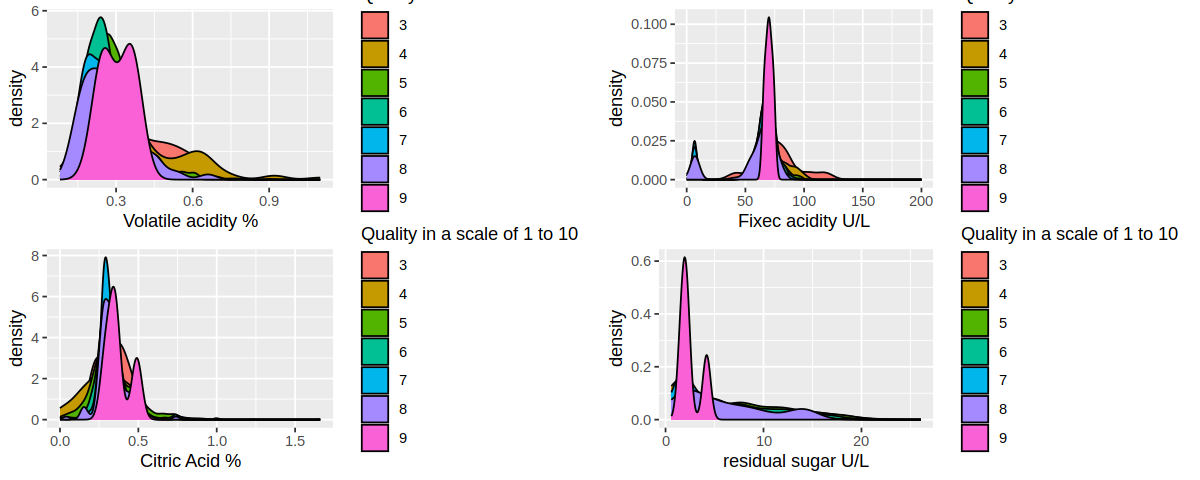

Warning message:
“Removed 52 rows containing non-finite values (`stat_density()`).”


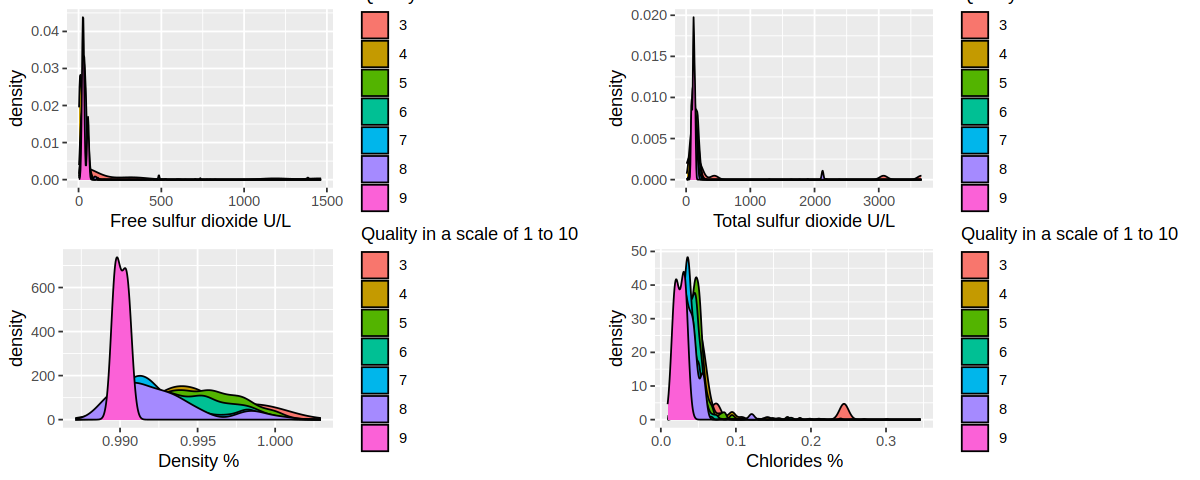

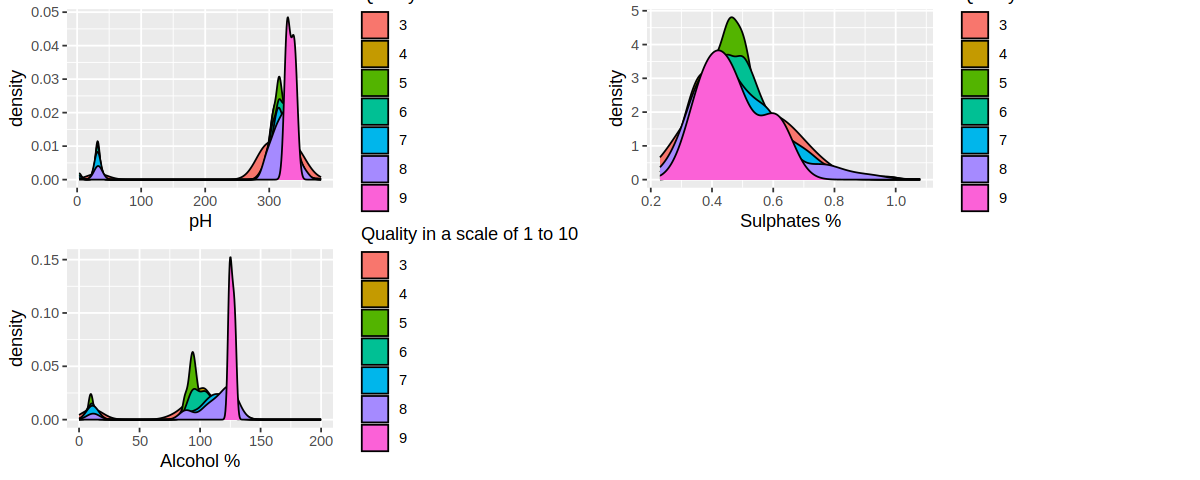

In [10]:
#generate plots

options(repr.plot.width = 10, repr.plot.height = 4)

plot_va <- wine_data_train |>
    ggplot(aes(x = `volatile acidity`, fill = quality),) +
    geom_density() +
    labs(x = "Volatile acidity %", fill = "Quality in a scale of 1 to 10") 
    
plot_fa <- wine_data_train |>
    ggplot(aes(x = `fixed acidity`, fill = quality),) +
    geom_density() +
    labs(x = "Fixec acidity U/L", fill = "Quality in a scale of 1 to 10") +
    xlim(0,200)
    
plot_ca <- wine_data_train |>
    ggplot(aes(x = `citric acid`, fill = quality),) +
    geom_density() +
    labs(x = "Citric Acid %", fill = "Quality in a scale of 1 to 10") 
    
plot_rs <- wine_data_train |>
    ggplot(aes(x = `residual sugar`, fill = quality),) +
    geom_density() +
    labs(x = "residual sugar U/L", fill = "Quality in a scale of 1 to 10")
    
plot_ch <- wine_data_train |>
    ggplot(aes(x = `chlorides`, fill = quality),) +
    geom_density() +
    labs(x = "Chlorides %", fill = "Quality in a scale of 1 to 10") 
    
plot_fsd <- wine_data_train |>
    ggplot(aes(x = `free sulfur dioxide`, fill = quality),) +
    geom_density() +
    labs(x = "Free sulfur dioxide U/L", fill = "Quality in a scale of 1 to 10") 
    
plot_tsd <- wine_data_train |>
    ggplot(aes(x = `total sulfur dioxide`, fill = quality),) +
    geom_density() +
    labs(x = "Total sulfur dioxide U/L", fill = "Quality in a scale of 1 to 10") 
    
plot_de <- wine_data_train |>
    ggplot(aes(x = `density`, fill = quality),) +
    geom_density() +
    labs(x = "Density %", fill = "Quality in a scale of 1 to 10") 
    
plot_ph <- wine_data_train |>
    ggplot(aes(x = `pH`, fill = quality),) +
    geom_density() +
    labs(x = "pH", fill = "Quality in a scale of 1 to 10") 


plot_su <- wine_data_train |>
    ggplot(aes(x = `sulphates`, fill = quality),) +
    geom_density() +
    labs(x = "Sulphates %", fill = "Quality in a scale of 1 to 10") 
    
plot_al <- wine_data_train |>
    ggplot(aes(x = `alcohol`, fill = quality),) +
    geom_density() +
    #scale_x_log10()+
    labs(x = "Alcohol %", fill = "Quality in a scale of 1 to 10") +
    xlim(0, 200)
    

plot_grid(plot_va, plot_fa, plot_ca, plot_rs) 
plot_grid(plot_fsd, plot_tsd, plot_de, plot_ch) 
plot_grid(plot_ph, plot_su, plot_al)



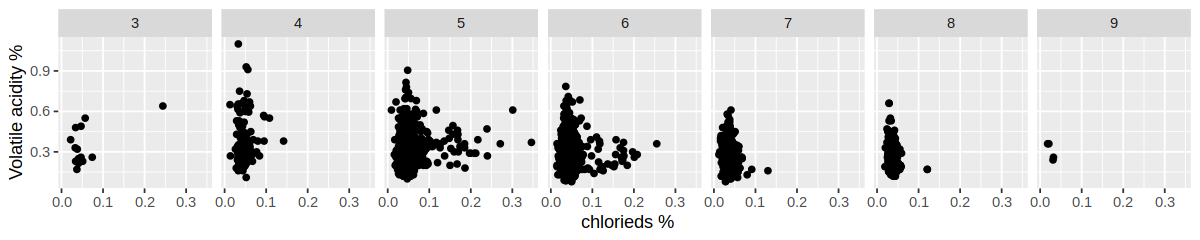

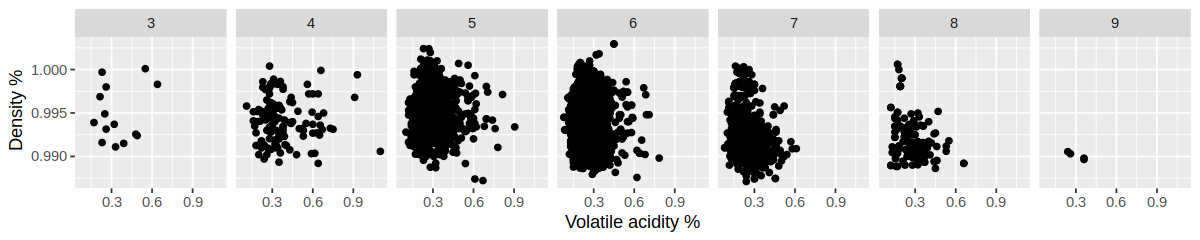

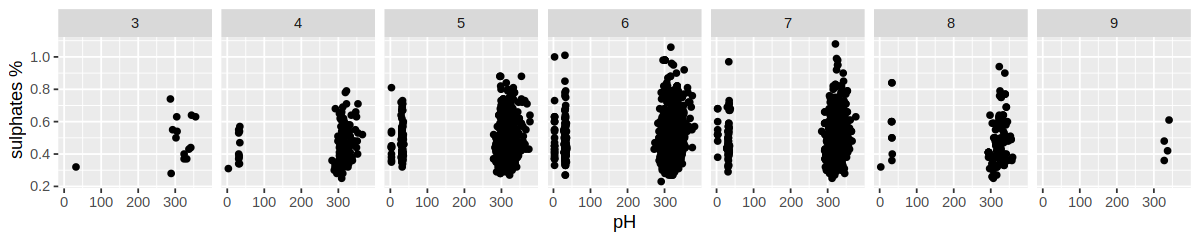

In [11]:
#generate plots

options(repr.plot.width = 10, repr.plot.height = 2)

plot_ch_by_va <- wine_data_train |>
    ggplot(aes(x = `chlorides`, y = `volatile acidity` )) +
    facet_grid(cols = vars(quality)) +
    geom_point()+ 
    labs(y = "Volatile acidity %", x = " chlorieds %")

plot_va_by_de <- wine_data_train |>
    ggplot(aes(x = `volatile acidity`, y = `density` )) +
    facet_grid(cols = vars(quality)) +
    geom_point()+
    labs(x = "Volatile acidity %", y = " Density %")

plot_ph_by_su <- wine_data_train |>
    ggplot(aes(x = `pH`, y = `sulphates` )) +
    facet_grid(cols = vars(quality)) +
    geom_point()+ 
    labs(x = "pH", y = " sulphates %")


plot_ch_by_va
plot_va_by_de
plot_ph_by_su

So with that we selected the variables we are going to use

In [12]:
wine_data_train_2 <- wine_data_train |>
    select(quality, `volatile acidity`, `chlorides`, `density`, `pH`, `sulphates` )
wine_data_test_2 <- wine_data_test |>
    select(quality, `volatile acidity`, `chlorides`, `density`, `pH`, `sulphates` )


# Expected outcomes and significance

 * We expect to find the quality of a specific white wine using the predictors “volatile acidity”, “pH”, "chlorides", “density” and “sulphates”.

 * It could help producers know which aspect of wine making to make improvements on to subsequently increase their product quality and attract more wholesale buyers.

 * This study may lead to questions about the nuanced interactions between these predictors and other influential factors in wine quality, prompting exploration into more refined or additional variables that could further enhance predictions. Additionally, it could inspire investigations into specific techniques or alterations in winemaking processes aimed at optimizing these predictors and their collective impact on wine quality.
